In [41]:
%reload_ext autoreload
%autoreload 2

In [2]:

import os
import sys
import seaborn as sns

# import pyLDAvis
import pyLDAvis.gensim_models

import numpy as np

import pandas as pd
from gensim import corpora, models
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

/usr/lib/python3/dist-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [31]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
from src.preprocessing import Preprocessing

In [6]:
# Initialize DataLoader
sl = SlackDataLoader('../Anonymized_B6SlackExport_25Nov23/anonymized/')

In [8]:
# converting all json files for all-technical-support channel to dataframe using slack_parser method from loader script
df_technical = sl.slack_parser('../Anonymized_B6SlackExport_25Nov23/anonymized/all-technical-support/')

### plot histogram of the time difference between Consecutive messages

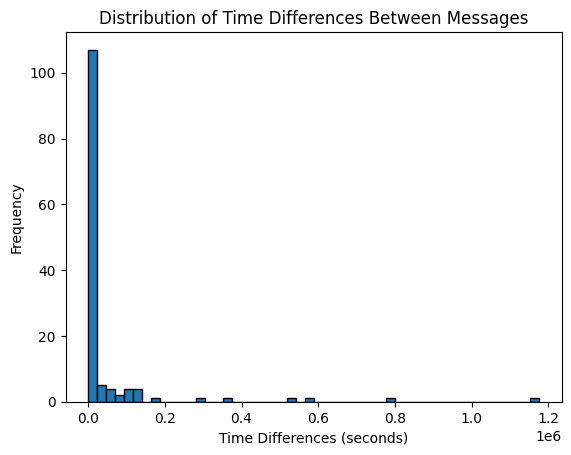

In [9]:
# Convert 'message_sent_time' to datetime format
# df['message_sent_time'] = pd.to_datetime(df['message_sent_time'])
df_technical['msg_sent_time'] = pd.to_datetime(df_technical['msg_sent_time'], unit='s')

# Sort the DataFrame by 'message_sent_time'
df_technical = df_technical.sort_values(by='msg_sent_time')

# Calculate time differences between consecutive messages
df_technical['time_difference'] = df_technical['msg_sent_time'].diff()

# Plot the distribution of time differences
plt.hist(df_technical['time_difference'].dt.total_seconds(), bins=50, edgecolor='black')
plt.xlabel('Time Differences (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Differences Between Messages')
plt.show()


### Plot a histogram of the time difference between Consecutive replies

### We will generate a histogram illustrating the time differences between consecutive replies for message with the highest reply count.

In [10]:
# Find the index of the maximum reply_count
max_reply_count= df_technical['reply_count'].max()
max_reply_count

9

##### let's get the message with the highest reply count(9)

In [11]:
msg_content = sl.get_channel_messages(channel_name='all-technical-support')

In [12]:
def filter_msg(msg_content):
    
    for msg in msg_content:
        if 'reply_count' in msg.keys():
            if msg['reply_count']==9:
                return msg

In [13]:
top_reply_count_message = filter_msg(msg_content)

In [14]:
# convery replies key to a dataframe
df_replies = pd.DataFrame(top_reply_count_message['replies'])

In [15]:
df_replies.columns

Index(['user', 'ts'], dtype='object')

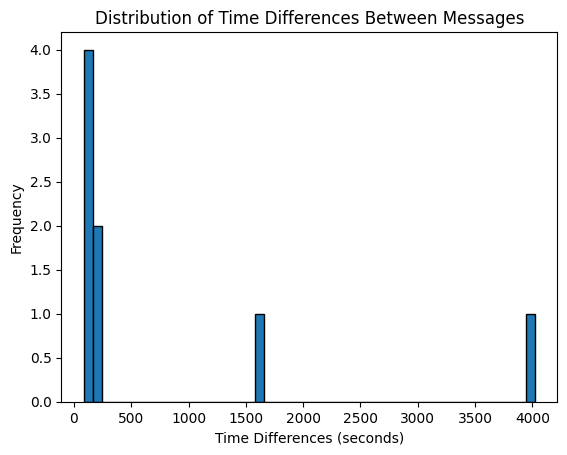

In [16]:
df_replies['ts'] = pd.to_datetime(df_replies['ts'], unit='s')

# Sort the DataFrame by 'message_sent_time'
df_replies = df_replies.sort_values(by='ts')

# Calculate time differences between consecutive messages
df_replies['time_difference'] = df_replies['ts'].diff()

# Plot the distribution of time differences
plt.hist(df_replies['time_difference'].dt.total_seconds(), bins=50, edgecolor='black')
plt.xlabel('Time Differences (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Differences Between Messages')
plt.show()


In [ ]:
!pip3 install gensim
!pip3 install pyLDAvis

In [18]:
from gensim import corpora, models
from gensim.similarities import MatrixSimilarity
from gensim.utils import SaveLoad
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from re import sub
import pyLDAvis
from collections import Counter
from gensim.matutils import corpus2csc, sparse2full, corpus2dense
from wordcloud import WordCloud
from sklearn.utils import resample

In [19]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [20]:
df_technical.head()

msg_type                                        msg_content  \
110  message  Which feature did you use to make the aggregat...   
111  message  <@U03UVHCV6KB> Please ask this question in <#C...   
117  message                               done already, thanks   
96   message        Can the reports we submit be in ppt format?   
97   message              ppt is not typically for written text   

          sender_name                 msg_sent_time msg_dist_type  \
110     Travis Butler 2022-08-22 22:03:28.184729099          text   
111  Katherine Foster 2022-08-23 05:20:16.288839102          user   
117     Travis Butler 2022-08-23 08:20:41.901149035          text   
96     Phillip Atkins 2022-08-24 17:16:35.425049067          text   
97   Katherine Foster 2022-08-24 17:16:57.528398991          text   

     time_thread_start  reply_count  reply_users_count  \
110                  0            0                  0   
111  1661232016.288839            1                  1   
117  1661232016.288839            0                  0   
96   1661361395.425049            4                  3   
97   1661361395.425049            0                  0   

                             reply_users      tm_thread_end channel  \
110                                    0                  0           
111                          U03UVHCV6KB  1661242841.901149           
117                                    0                  0           
96   U03U93GNNVB,U03UG4Q7V42,U03UJN29Y4C  1661363591.600409           
97                                     0                  0           

              time_difference  
110                       NaT  
111 0 days 07:16:48.104110003  
117 0 days 03:00:25.612309933  
96  1 days 08:55:53.523900032  
97  0 days 00:00:22.103349924

In [21]:
preprocess = Preprocessing(df_technical)

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

# clean text 
df_technical = preprocess.cleantext('msg_content', 'clean_msg_content')

# Stem words
df_technical = preprocess.stem('clean_msg_content')

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

In [42]:
# Used stemmer instead of lemmatizer
cleanKagslacklist = preprocess.filterSlackList(df_technical['clean_msg_content'])

In [43]:
cleanKagslacklist[1]

['plea',
 'ask',
 'question',
 'question',
 'issu',
 'relat',
 'platform',
 'instal',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [28]:
def makeDict(mySlackList):
    """Create dictionary from list of tokenized documents"""
    return corpora.Dictionary(mySlackList)

def makeCorpus(mySlackList,myDict):
    """Create corpus from list of tokenized documents"""
    return [myDict.doc2bow(slackmessage) for slackmessage in mySlackList]

def createLDA(myCorpus, myDictionary,myTopics=50,myPasses=10,myIterations=50,myAlpha=0.001):
    """LDA model call function"""
    return models.LdaMulticore(myCorpus, id2word=myDictionary, num_topics=myTopics, passes=myPasses,
    iterations=myIterations,alpha=myAlpha)

In [29]:
"""Create model objects"""
kagDict   = makeDict(cleanKagslacklist)
kagCorpus = makeCorpus(cleanKagslacklist, kagDict)
kagLda = createLDA(kagCorpus, kagDict)

"""Save model objects"""
SaveLoad.save(kagLda,'kaggleLDAmodel')
corpora.MmCorpus.serialize('kaggleCorpus.mm', kagCorpus)
kagDict.save('kaggleDictionary.dict')

In [ ]:
kagLda = SaveLoad.load('kaggleLDAmodel')
kagDict = corpora.Dictionary.load('kaggleDictionary.dict')
kagCorpus = corpora.MmCorpus('kaggleCorpus.mm')

In [ ]:
pyLDAvis.enable_notebook()
ldaViz = pyLDAvis.gensim_models.prepare(kagLda, kagCorpus, kagDict)

In [32]:
kagLda.print_topics()

[(22,
  '0.067*"sure" + 0.067*"hope" + 0.067*"much" + 0.067*"thank" + 0.067*"easi" + 0.067*"work" + 0.067*"go" + 0.067*"without" + 0.067*"account" + 0.001*"proof"'),
 (24,
  '0.072*"score" + 0.072*"guess" + 0.072*"fill" + 0.072*"complaint" + 0.072*"isnt" + 0.072*"think" + 0.072*"upload" + 0.072*"week" + 0.001*"contract" + 0.001*"everyth"'),
 (42,
  '0.110*"tri" + 0.110*"cach" + 0.110*"clear" + 0.002*"easi" + 0.002*"request" + 0.002*"contract" + 0.002*"everyth" + 0.002*"without" + 0.002*"sure" + 0.002*"sent"'),
 (30,
  '0.095*"upload" + 0.095*"soon" + 0.095*"time" + 0.048*"get" + 0.048*"sure" + 0.048*"forward" + 0.048*"cost" + 0.048*"total" + 0.048*"error" + 0.048*"includ"'),
 (16,
  '0.184*"link" + 0.148*"github" + 0.111*"submiss" + 0.074*"interim" + 0.037*"final" + 0.037*"either" + 0.037*"access" + 0.037*"cant" + 0.037*"tenx" + 0.037*"platform"'),
 (35,
  '0.124*"error" + 0.063*"network" + 0.063*"think" + 0.063*"singl" + 0.063*"size" + 0.063*"even" + 0.063*"minimum" + 0.063*"issu" + 0

### Top 10 Topics

In [33]:
num_topics = 10

for topic_id, topic in kagLda.show_topics(num_topics=num_topics, formatted=False):
    print(f"Topic {topic_id + 1}: {', '.join([word[0] for word in topic])}")


Topic 28: ok, fix, clear, tnx, tri, catch, proof, everyth, sure, contract
Topic 18: lost, error, second, boom, code, show, work, submiss, receiv, note
Topic 43: tri, cach, clear, easi, request, contract, everyth, without, sure, sent
Topic 7: think, question, file, size, limit, type, trainingrel, regard, ask, gener
Topic 27: thank, channel, okay, technic, share, plea, resourc, lodg, relat, platform
Topic 46: email, check, main, origin, right, tri, git, push, proof, sent
Topic 10: clear, cooki, good, tri, receiv, confirm, plea, thank, weve, like
Topic 23: sure, hope, much, thank, easi, work, go, without, account, proof
Topic 3: assign, form, claim, new, read, role, member, commun, sure, write
Topic 22: link, payment, work, saw, week, good, one, morn, tenx, contract


In [34]:
def translateLdaIdx(myLdaModel, myLdaViz):
    """Translate lda model topics to match the topics in pyLDAvis visualization"""
    ldaVizIdx = myLdaViz[0].index
    return list(ldaVizIdx)

In [35]:
newIdx = translateLdaIdx(kagLda,ldaViz)

In [36]:
def createDenseMat(myLdaModel,myCorpus,newIdx):
    """Transform corpus to dataframe with topics matching lda visualization"""
    numTopics = myLdaModel.num_topics
    myDense = corpus2dense(myLdaModel[myCorpus],numTopics)
    myDf = pd.DataFrame(myDense)
    mySortedDf = myDf.transpose()
    mySortedDf = myDf.transpose()[newIdx]
    mySortedDf.columns = ['topic' + str(i + 1) for i in range(numTopics)]
    return mySortedDf

In [37]:
kagDf = createDenseMat(kagLda,kagCorpus,newIdx)

In [38]:
def sortByTopicToIdx(cleanKagslacklist,mySortedDf,myTopic,myTopicThresh=0.1):
    """Returns an index of tweets surpassing a topic value threshold"""
    srtIdx = list(mySortedDf[mySortedDf[myTopic]>myTopicThresh].index)
    return srtIdx

def sortSlackByIdx(cleanKagslacklist,srtIdx):
    """Returns sorted tweets as a list based on a defined sort index"""
    myCleanArray = np.array(cleanKagslacklist)
    srtTweets = list(myCleanArray[srtIdx])
    return srtTweets

In [39]:
sortedIdx = sortByTopicToIdx(cleanKagslacklist,kagDf,'topic2',myTopicThresh=0.1)

In [44]:
# Word cloud for topic 
def makeWordCloud(cleanKagslacklist,mySortedDf,myTopic,myTopicThresh=0.1):
    """Create word cloud of tweets passing a given threshold for a given topic"""
    sortedIdx = sortByTopicToIdx(cleanKagslacklist,mySortedDf,myTopic,myTopicThresh=0.1)
    mySortedSlack = sortSlackByIdx(cleanKagslacklist,sortedIdx)
    filteredWords = ' '.join([' '.join(filter(None, string)) for string in mySortedSlack])
    myTopicCloud = WordCloud(width=800, height=800, max_font_size=100, scale=8).generate(filteredWords)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 10), dpi=1600)
    plt.imshow(myTopicCloud)
    plt.axis("off")  # Turn off axis labels
    plt.show()


In [45]:
makeWordCloud(cleanKagslacklist,kagDf,'topic2',myTopicThresh=0.2)